In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


image shape: (200, 200, 3)
gray shape:  (200, 200)


Text(0.5, 1.0, 'Gray Image')

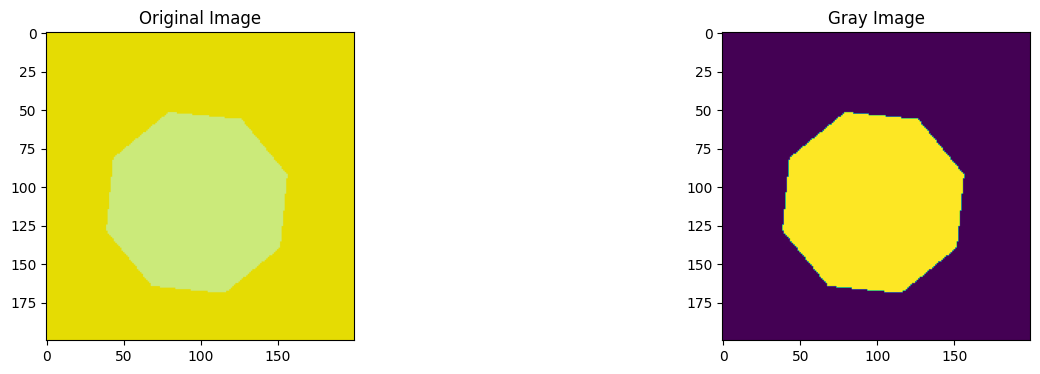

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Octagon.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('image shape:', img.shape)
print('gray shape: ', gray.shape)

plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(gray)
plt.title('Gray Image')

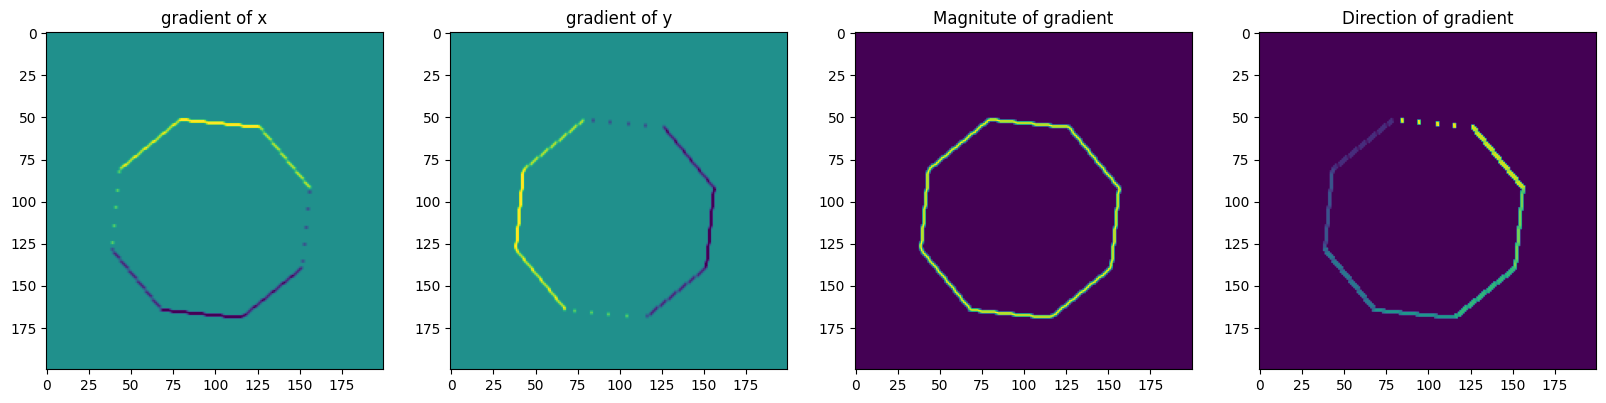

In [3]:
# Calculate gradient gx, gy
gx = cv2.Sobel(gray, cv2.CV_32F, dx=0, dy=1, ksize=3)
gy = cv2.Sobel(gray, cv2.CV_32F, dx=1, dy=0, ksize=3)
g, theta = cv2.cartToPolar(gx, gy, angleInDegrees=True)
w = 20
h = 10

plt.figure(figsize=(w, h))
plt.subplot(1, 4, 1)
plt.title('gradient of x')
plt.imshow(gx)

plt.subplot(1, 4, 2)
plt.title('gradient of y')
plt.imshow(gy)

plt.subplot(1, 4, 3)
plt.title('Magnitute of gradient')
plt.imshow(g)

plt.subplot(1, 4, 4)
plt.title('Direction of gradient')
plt.imshow(theta)

Kích thước hog features:  (54756,)


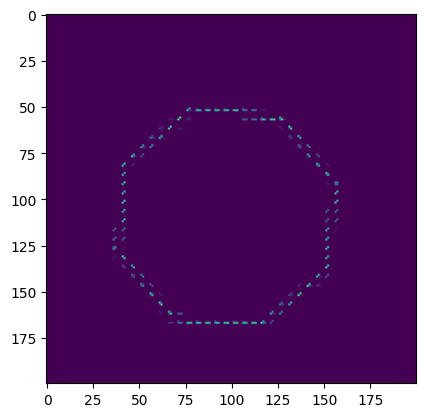

In [4]:
from skimage import exposure
from skimage import feature
import cv2
import matplotlib.pyplot as plt

(H, hogImage) = feature.hog(gray, orientations=9, pixels_per_cell=(5, 5),
    cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2",
    visualize=True)
print('Kích thước hog features: ', H.shape)
# Biểu diễn phân phối HOG
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")

plt.imshow(hogImage)

(12996,)


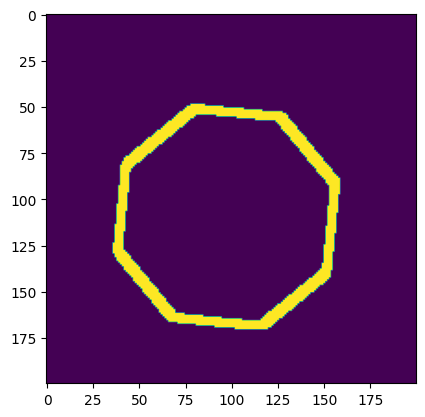

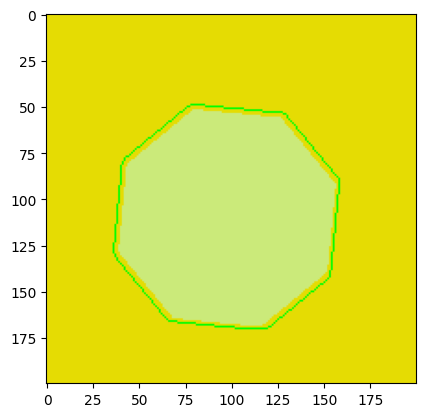

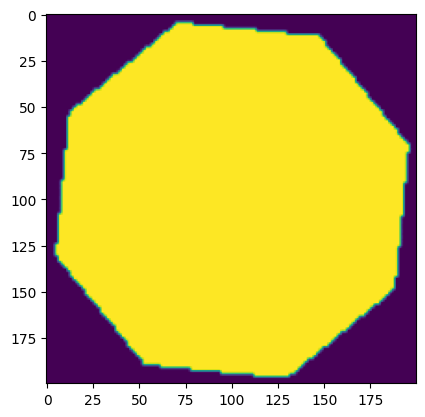

In [5]:
import imutils

img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Octagon.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edged = imutils.auto_canny(gray)
edged = cv2.dilate(edged, None, iterations = 2)

# Tìm contours trong edge map, chỉ giữ lại contours lớn nhất
#ret, thresh = cv2.threshold(edged, 127, 255, 0) # convert to binary image
cnts = cv2.findContours(edged, cv2.RETR_EXTERNAL,
                      cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key = cv2.contourArea)

# Trích xuất đa giác và resize lại kích thước ảnh về 200x200
(x, y, w, h) = cv2.boundingRect(c)
logo = gray[y:y+h, x:x+w]
logo = cv2.resize(logo, (200, 200))
cv2.drawContours(img, cnts, -1, (0,255,0), 1) # 5 mean that offset = 5

H = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),
        cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
print(H.shape)
plt.imshow(edged)
plt.show()
plt.imshow(img)
plt.show()
plt.imshow(logo)
plt.show()

In [ ]:
!unzip '/content/gdrive/MyDrive/Colab Notebooks/dataset.zip' -d '/content/gdrive/MyDrive/Colab Notebooks/'

In [6]:
from PIL import Image
from pathlib import Path
import pathlib
from random import choice, seed, randrange

In [7]:
# Đường dẫn ảnh gốc
root = '/content/gdrive/MyDrive/Colab Notebooks/output'

# Lấy ảnh ngẫu nhiên trong tập và gán nhãn
def take_random_img_label():
    path = choice(paths)
    img = cv2.imread(path.as_posix())
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    label = pathlib.PurePath(path).name.split('_')[0]
    return img, label

In [8]:
# Gán nhãn
shape = ['Circle', 'Heptagon', 'Hexagon', 'Nonagon', 'Octagon', 'Pentagon', 'Square', 'Star', 'Triangle']
labels = dict()
for i in range(0,len(shape)):
    labels.update({shape[i]: i})
labels

{'Circle': 0,
 'Heptagon': 1,
 'Hexagon': 2,
 'Nonagon': 3,
 'Octagon': 4,
 'Pentagon': 5,
 'Square': 6,
 'Star': 7,
 'Triangle': 8}

In [10]:
# Lấy tất cả đường dẫn ảnh
paths = list(Path(root).rglob('*.png'))

2


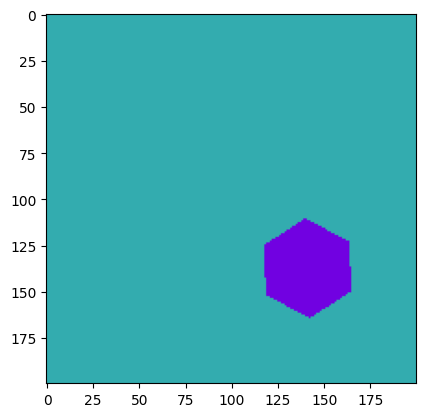

In [11]:
path = choice(paths)
img = cv2.imread(path.as_posix())
label_ = pathlib.PurePath(path).name.split('_')[0]
print(labels[label_])
plt.imshow(img)
plt.show()

In [12]:
data = []
labels_data = []
for path in paths[:10000]:
    img = cv2.imread(path.as_posix())
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edeged = imutils.auto_canny(gray)
    edged = cv2.dilate(edged, None, iterations = 2)

    # Tìm contours trong edge map, chỉ giữ lại contours lớn nhất
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)

    # Trích xuất contour và resize lại kích thước ảnh về 200x200
    (x, y, w, h) = cv2.boundingRect(c)
    logo = gray[y:y+h, x:x+w]
    logo = cv2.resize(logo, (200, 200))

    # Khởi tạo HOG descriptor
    H = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),
        cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")

    # update the data and labels
    data.append(H)
    label_ = pathlib.PurePath(path).name.split('_')[0]
    labels_data.append(labels[label_])

In [ ]:
from sklearn.preprocessing import LabelEncoder

def _transform_data(data, labels):
    # Tạo input array X
    X = np.array(data)
    # Tạo output array y
    le = LabelEncoder()
    le.fit(labels)
    y = le.transform(labels)
    y_ind = np.unique(y)
    y_dict = dict(zip(y_ind, le.classes_))
    return X, y, y_dict, le

X_train, y_train, y_dict, le = _transform_data(data, labels_data)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
# Kiểm tra độ chính xác của mô hình trên train
from sklearn.metrics import classification_report
uniq_labels = list(y_dict.values())
print(classification_report(y_train, y_pred))


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_data, test_size=0.2, random_state=1989)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [16]:
params = {
    SVC.__name__: {},
    KNeighborsClassifier.__name__: dict(metric='manhattan',
                                        n_neighbors=2)
}

In [17]:
classifier = KNeighborsClassifier
Classifier = classifier(**params[classifier.__name__])
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)
print(classifier.__name__)
print(accuracy_score(y_test, y_pred))

KNeighborsClassifier
0.4305


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.64      0.35       213
           1       0.35      0.37      0.36       220
           2       0.51      0.30      0.38       223
           3       0.24      0.16      0.19       227
           4       0.37      0.14      0.20       220
           5       0.81      0.35      0.49       210
           6       0.91      0.37      0.53       230
           7       1.00      0.54      0.70       224
           8       0.44      0.99      0.61       233

    accuracy                           0.43      2000
   macro avg       0.54      0.43      0.42      2000
weighted avg       0.54      0.43      0.42      2000



In [ ]:
classifier = SVC
Classifier = classifier(**params[classifier.__name__])
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)
print(classifier.__name__)
print(accuracy_score(y_test, y_pred))